In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import glob
import os

In [188]:
#ディレクトリ変更
os.chdir('/opt')

#hitterデータの読み込み
df_2022 = pd.read_csv("playerData_2022.csv")
df_2022["ops"] = df_2022["出塁率"] + df_2022["長打率"]
df_2022["woba"] = (df_2022["安打"]*0.9 + df_2022["二塁打"]*1.3 + df_2022["三塁打"]*1.6 + df_2022["本塁打"]* 2) / (df_2022["四球"] + df_2022["死球"] + df_2022["犠飛"] + df_2022["打数"]) 
df_2022["wraa"] = (df_2022["woba"] - df_2022["woba"].mean()) / 1.2 * (df_2022["四球"] + df_2022["死球"] + df_2022["犠飛"] + df_2022["打数"])
df_2021 = pd.read_csv("playerData_2021.csv")
df_2021["ops"] = df_2021["出塁率"] + df_2021["長打率"]
df_2021["woba"] = (df_2021["安打"]*0.9 + df_2021["二塁打"]*1.3 + df_2021["三塁打"]*1.6 + df_2021["本塁打"]* 2) / (df_2021["四球"] + df_2021["死球"] + df_2021["犠飛"] + df_2021["打数"]) 
df_2021["wraa"] = (df_2021["woba"] - df_2021["woba"].mean()) / 1.2 * (df_2021["四球"] + df_2021["死球"] + df_2021["犠飛"] + df_2021["打数"])
df_2020 = pd.read_csv("playerData_2020.csv")
df_2020["ops"] = df_2020["出塁率"] + df_2020["長打率"]
df_2020["woba"] = (df_2020["安打"]*0.9 + df_2020["二塁打"]*1.3 + df_2020["三塁打"]*1.6 + df_2020["本塁打"]* 2) / (df_2020["四球"] + df_2020["死球"] + df_2020["犠飛"] + df_2020["打数"]) 
df_2020["wraa"] = (df_2020["woba"] - df_2020["woba"].mean()) / 1.2 * (df_2020["四球"] + df_2020["死球"] + df_2020["犠飛"] + df_2020["打数"])

In [189]:
#年情報を付与
df_2022["year"] = 2022
df_2021["year"] = 2021
df_2020["year"] = 2020

In [190]:
#ディレクトリ変更
os.chdir('/opt/2022')

money_2022 = pd.DataFrame(columns = [])

In [191]:
#2022年の年棒データを作成
for i in glob.glob("money*"):
    tmp = pd.read_csv(i)
    money_2022 = pd.concat([money_2022, tmp])
money_2022.shape

(983, 12)

In [192]:
#ディレクトリ変更
os.chdir('/opt/2021')

money_2021 = pd.DataFrame(columns = [])

In [193]:
#2021年の年棒データを作成
for i in glob.glob("money*"):
    tmp = pd.read_csv(i)
    money_2021 = pd.concat([money_2021, tmp])
money_2021.shape

(950, 12)

In [194]:
df_2022_data = pd.merge(df_2022, money_2022[["選手名","守備","年齢","年数","年俸(推定)"]],on="選手名", how="inner")
df_2021_data = pd.merge(df_2021, money_2021[["選手名","守備","年齢","年数","年俸(推定)"]], on="選手名", how="inner")
df_2020_data = pd.merge(df_2020, money_2021[["選手名","守備","年齢","年数","年俸(推定)"]], on="選手名", how="inner")

In [195]:
#hitterに年棒を追加
df = pd.concat([df_2022_data,df_2021_data])
df = pd.concat([df, df_2020_data])
print(df.shape)

(1029, 33)


In [196]:
df.head()

,順位,選手名,チーム,打率,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,敬遠,死球,三振,併殺打,出塁率,長打率,ops,woba,wraa,year,守備,年齢,年数,年俸(推定)
0,1,佐藤 輝明,阪神,0.261,121,512,459,57,120,30,6,18,216,70,8,2,0,7,42,4,4,117,5,0.324,0.471,0.795,0.376172,59.057400,2022,内野手,23歳,2年,"4,200万円"
1,2,丸 佳浩,巨人,0.281,120,508,441,71,124,23,1,24,221,54,5,6,1,0,65,1,1,72,6,0.375,0.501,0.876,0.376923,58.798050,2022,外野手,33歳,15年,"45,000万円"
2,2,浅村 栄斗,楽天,0.252,115,508,429,57,108,16,0,20,184,68,4,3,0,4,70,6,5,110,11,0.360,0.429,0.789,0.311024,31.016587,2022,内野手,31歳,14年,"50,000万円"
3,2,中野 拓夢,阪神,0.277,113,508,473,55,131,16,3,4,165,23,20,6,18,1,14,0,2,71,7,0.300,0.349,0.649,0.309184,29.166261,2022,内野手,26歳,2年,"3,700万円"
4,5,坂倉 将吾,広島,0.289,121,505,456,64,132,17,3,12,191,56,1,1,0,4,37,2,8,72,13,0.350,0.419,0.769,0.336040,41.360977,2022,捕手,24歳,6年,"5,000万円"


In [197]:
#dfのcolumnsを確認
df.columns

Index(['順位', '選手名', 'チーム', '打率', '試合', '打席数', '打数', '得点', '安打', '二塁打', '三塁打',
       '本塁打', '塁打', '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '敬遠', '死球', '三振',
       '併殺打', '出塁率', '長打率', 'ops', 'woba', 'wraa', 'year', '守備', '年齢', '年数',
       '年俸(推定)'],
      dtype='object')

In [198]:
#年棒（推定）は使いづらいので年棒に変更
df = df.rename(columns={"年俸(推定)":"年棒"})

In [199]:
#年棒のユニークを確認
df["年棒"].unique() #単位は万円のみ

#データの修正
df["年棒"] = df["年棒"].str.replace(",","").str.replace("万円","")
df["年齢"] = df["年齢"].str.replace("歳","").astype(float)
df["年数"] = df["年数"].str.replace("年","").astype(float)

In [200]:
df = df.dropna(subset = ["年棒"])
df

,順位,選手名,チーム,打率,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,敬遠,死球,三振,併殺打,出塁率,長打率,ops,woba,wraa,year,守備,年齢,年数,年棒
0,1,佐藤 輝明,阪神,0.261,121,512,459,57,120,30,6,18,216,70,8,2,0,7,42,4,4,117,5,0.324,0.471,0.795,0.376172,59.057400,2022,内野手,23.0,2.0,4200
1,2,丸 佳浩,巨人,0.281,120,508,441,71,124,23,1,24,221,54,5,6,1,0,65,1,1,72,6,0.375,0.501,0.876,0.376923,58.798050,2022,外野手,33.0,15.0,45000
2,2,浅村 栄斗,楽天,0.252,115,508,429,57,108,16,0,20,184,68,4,3,0,4,70,6,5,110,11,0.360,0.429,0.789,0.311024,31.016587,2022,内野手,31.0,14.0,50000
3,2,中野 拓夢,阪神,0.277,113,508,473,55,131,16,3,4,165,23,20,6,18,1,14,0,2,71,7,0.300,0.349,0.649,0.309184,29.166261,2022,内野手,26.0,2.0,3700
4,5,坂倉 将吾,広島,0.289,121,505,456,64,132,17,3,12,191,56,1,1,0,4,37,2,8,72,13,0.350,0.419,0.769,0.336040,41.360977,2022,捕手,24.0,6.0,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,318,桒原 樹,広島,0.000,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000000,-0.641446,2020,内野手,25.0,7.0,550
302,318,山本 祐大,DeNA,0.000,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0.000,0.000000,-0.641446,2020,捕手,23.0,4.0,605
303,322,村林 一輝,楽天,0.000,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000000,-0.213815,2020,内野手,24.0,6.0,700
304,322,白濱 裕太,広島,0.000,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000000,-0.213815,2020,捕手,36.0,18.0,650


In [201]:
df = df[df["年棒"]!="-"]
df["年棒"] = df["年棒"].astype(int)

<ipython-input-201-e17decaa489b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["年棒"] = df["年棒"].astype(int)


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 305
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   順位      1028 non-null   int64  
 1   選手名     1028 non-null   object 
 2   チーム     1028 non-null   object 
 3   打率      1028 non-null   float64
 4   試合      1028 non-null   int64  
 5   打席数     1028 non-null   int64  
 6   打数      1028 non-null   int64  
 7   得点      1028 non-null   int64  
 8   安打      1028 non-null   int64  
 9   二塁打     1028 non-null   int64  
 10  三塁打     1028 non-null   int64  
 11  本塁打     1028 non-null   int64  
 12  塁打      1028 non-null   int64  
 13  打点      1028 non-null   int64  
 14  盗塁      1028 non-null   int64  
 15  盗塁刺     1028 non-null   int64  
 16  犠打      1028 non-null   int64  
 17  犠飛      1028 non-null   int64  
 18  四球      1028 non-null   int64  
 19  敬遠      1028 non-null   int64  
 20  死球      1028 non-null   int64  
 21  三振      1028 non-null   int64  
 22  併

In [203]:
#基本統計情報
df[df["year"]==2022].describe()

,順位,打率,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,敬遠,死球,三振,併殺打,出塁率,長打率,ops,woba,wraa,year,年齢,年数,年棒
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,368.000000,368.000000,370.0,370.000000,370.000000,370.000000
mean,181.154054,0.198246,45.943243,140.327027,125.251351,13.675676,31.078378,5.332432,0.610811,2.951351,46.486486,13.089189,2.059459,1.051351,2.197297,0.835135,10.578378,0.545946,1.454054,26.727027,2.535135,0.256573,0.287181,0.543754,0.239016,7.493914,2022.0,27.394595,6.700000,5587.213514
std,104.728818,0.088250,34.230836,147.106504,130.819552,16.470972,36.252753,6.815038,1.229666,5.511536,56.658020,17.505559,4.262616,1.664246,3.903510,1.305547,14.181387,1.668876,2.313926,26.723285,3.326841,0.109864,0.143974,0.235904,0.112673,14.933368,0.0,4.783211,4.680496,9020.843775
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.217072,2022.0,18.000000,1.000000,280.000000
25%,90.250000,0.154500,17.250000,26.000000,22.250000,2.000000,3.250000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.201000,0.207000,0.430250,0.179492,-1.188780,2022.0,24.000000,3.000000,900.000000
50%,182.000000,0.217000,37.500000,71.500000,66.000000,6.500000,14.000000,2.000000,0.000000,1.000000,19.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,17.000000,1.000000,0.275000,0.307000,0.592500,0.260923,1.089634,2022.0,27.000000,5.500000,1975.000000
75%,271.000000,0.259000,72.000000,234.000000,210.250000,20.000000,51.000000,8.000000,1.000000,3.750000,70.750000,20.000000,2.000000,2.000000,2.000000,1.000000,15.750000,0.000000,2.000000,41.750000,4.000000,0.324000,0.375000,0.694500,0.315676,10.797399,2022.0,30.000000,9.000000,6000.000000
max,365.000000,0.500000,121.000000,512.000000,473.000000,95.000000,134.000000,30.000000,8.000000,49.000000,298.000000,120.000000,35.000000,8.000000,31.000000,7.000000,97.000000,19.000000,15.000000,125.000000,18.000000,1.000000,0.765000,1.232000,0.535000,102.310814,2022.0,45.000000,22.000000,62000.000000


打率は平均20%、標準偏差9%と差が激しい。
打数を見ると平均が125に対して0回も存在する。
年齢の平均は27歳、年数は6年。

<BarContainer object of 372 artists>

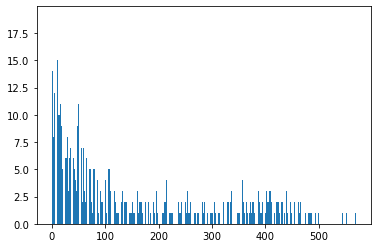

In [204]:
#打数を確認
tmp = df.groupby("打数").agg({"順位":"count"}).reset_index()
plt.bar(tmp["打数"],tmp["順位"])

打数には大きく乖離があることがわかる
一番多いのが0回から１００までが多いことから打席に立てない選手が一定数いることが伺える

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26834 missing from current font.
  font.set_text(s, 0, flags=flags)


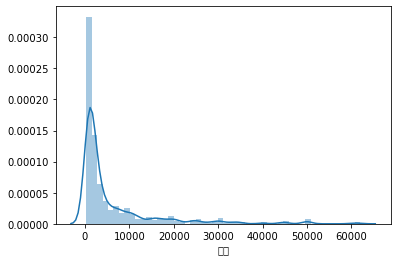

In [207]:
#sns.distplotでヒストグラムを描く
sns.distplot(df['年棒'])
plt.show()

ほとんどが低い年棒に集中している。
右に裾が広く年棒の高い選手は60000万円以上となる。

In [208]:
#チームによる平均に差があるか確認する
df.groupby("チーム").agg({"年棒":"mean","ops":"mean","wraa":"mean"}).reset_index().sort_values(by="wraa")

,チーム,年棒,ops,wraa
8,日本ハム,4719.021739,0.517685,5.081261
4,ロッテ,4867.469880,0.550542,5.475778
5,中日,4229.206522,0.558957,5.677368
1,オリックス,4790.129032,0.556247,6.456373
10,西武,5278.735632,0.515977,6.864790
9,楽天,5676.321839,0.566448,7.679220
11,阪神,4877.721519,0.559785,7.980760
2,ソフトバンク,12212.222222,0.660593,9.249445
7,広島,5770.731707,0.557293,10.469079
3,ヤクルト,6485.930233,0.605256,10.587451


wraaを指標として年棒を見ると、ソフトバンクは年棒がずば抜けて高いがwraaは１２球団中5位となる
DeNAはwraaは高いが年棒は12球団中下位6位となっている
中日はwraa、年棒ともに低い

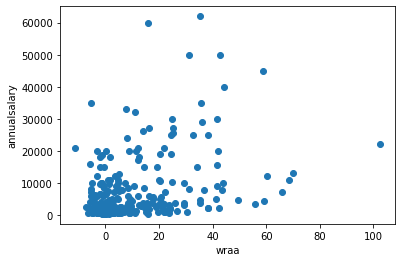

In [209]:
#2022年をwraaで可視化
plt.scatter(df[df["year"]==2022]["wraa"], df[df["year"]==2022]["年棒"])
plt.xlabel('wraa')
plt.ylabel('annualsalary')
plt.show();

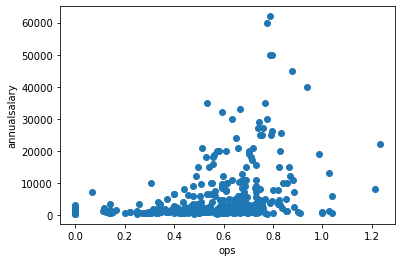

In [210]:
#2022年をopsで可視化
plt.scatter(df[df["year"]==2022]["ops"],df[df["year"]==2022]["年棒"])
plt.xlabel('ops')
plt.ylabel('annualsalary')
plt.show();

wraaを見ると0から20は年棒が10,000万以下が多い。
ごく稀にwraaが低い選手でも高い年棒をもらっている選手もいる
opsで見ると0.4-0.8までの間に多くの選手がいることがわかる

In [211]:
#2021年のwraaと2022年の年棒で確認
tmp1 = df[df["year"]==2021] 
tmp1 = pd.merge(tmp1,df[df["year"]==2022][["選手名","年棒"]],on="選手名",how="inner")

In [212]:
tmp1.head()

,順位,選手名,チーム,打率,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,敬遠,死球,三振,併殺打,出塁率,長打率,ops,woba,wraa,year,守備,年齢,年数,年棒_x,年棒_y
0,1,荻野 貴司,ロッテ,0.296,143,643,570,86,169,33,5,10,242,45,24,11,5,3,53,0,12,70,5,0.367,0.425,0.792,0.349530,55.283213,2021,外野手,36.0,12.0,8000,10000
1,2,鈴木 大地,楽天,0.277,143,628,552,70,153,19,3,10,208,53,3,2,13,5,52,0,6,51,12,0.343,0.377,0.720,0.304390,30.156232,2021,内野手,32.0,10.0,20000,20000
2,3,佐野 恵太,DeNA,0.303,143,615,545,73,165,34,2,17,254,72,0,1,0,4,61,1,5,73,14,0.376,0.466,0.842,0.373821,65.739565,2021,外野手,27.0,5.0,7000,11000
3,3,中村 奨吾,ロッテ,0.283,143,615,506,78,143,36,2,9,210,67,12,7,15,8,76,1,10,90,8,0.382,0.415,0.797,0.327833,41.142259,2021,内野手,29.0,7.0,6700,11000
4,3,村上 宗隆,ヤクルト,0.278,143,615,500,82,139,27,0,39,283,112,12,7,0,3,106,6,6,133,12,0.408,0.566,0.974,0.387317,72.656232,2021,内野手,21.0,4.0,10000,22000


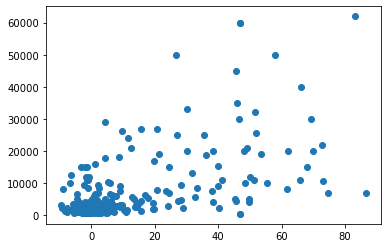

In [213]:
plt.scatter(tmp1["wraa"],tmp1["年棒_y"])

2021年のwraaと2022年の年棒は若干相関がありそう
基本的にはwraaが高いほど年棒も高くなっている
20以降はばらつきが大きいことが伺える

In [214]:
pd.set_option('display.max_columns', 100)
tmp1.corr()

,順位,打率,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,敬遠,死球,三振,併殺打,出塁率,長打率,ops,woba,wraa,year,年齢,年数,年棒_x,年棒_y
順位,1.000000,-0.613762,-0.885367,-0.924986,-0.925196,-0.838614,-0.893901,-0.831177,-0.518966,-0.672580,-0.874302,-0.814858,-0.343999,-0.455718,-0.368476,-0.681867,-0.794766,-0.527635,-0.645637,-0.861637,-0.731031,-0.603993,-0.679273,-0.673214,-0.652989,-0.692901,NaN,-0.273738,-0.156094,-0.455617,-0.538061
打率,-0.613762,1.000000,0.532018,0.549021,0.550894,0.531550,0.573669,0.528663,0.330570,0.401700,0.551881,0.497125,0.238910,0.276610,0.141441,0.382964,0.474052,0.351790,0.393553,0.473994,0.436209,0.924931,0.879166,0.934352,0.897804,0.509905,NaN,0.164717,0.074803,0.255072,0.331659
試合,-0.885367,0.532018,1.000000,0.907909,0.906648,0.872109,0.885971,0.829207,0.517941,0.673840,0.869405,0.817668,0.417042,0.491711,0.351833,0.687860,0.792274,0.542120,0.636273,0.832101,0.716161,0.544415,0.599896,0.599387,0.566343,0.711050,NaN,0.278110,0.161428,0.408777,0.521970
打席数,-0.924986,0.549021,0.907909,1.000000,0.998335,0.946908,0.987661,0.927564,0.579887,0.766677,0.974093,0.909454,0.386972,0.486522,0.308382,0.756447,0.891247,0.603708,0.700961,0.894612,0.795635,0.540754,0.631968,0.617010,0.600566,0.824299,NaN,0.228483,0.105751,0.490858,0.607802
打数,-0.925196,0.550894,0.906648,0.998335,1.000000,0.941493,0.989731,0.925649,0.587652,0.759955,0.973510,0.904162,0.388206,0.484018,0.298650,0.745809,0.866318,0.598892,0.692630,0.892294,0.799209,0.532000,0.630635,0.612358,0.604259,0.826582,NaN,0.225458,0.098144,0.479006,0.595495
得点,-0.838614,0.531550,0.872109,0.946908,0.941493,1.000000,0.955141,0.905099,0.591483,0.794582,0.959249,0.883843,0.478269,0.540470,0.239386,0.695001,0.881837,0.570610,0.713101,0.840893,0.704172,0.538890,0.627602,0.613571,0.586785,0.875174,NaN,0.169758,0.056301,0.476077,0.609615
安打,-0.893901,0.573669,0.885971,0.987661,0.989731,0.955141,1.000000,0.937443,0.596641,0.762673,0.982512,0.903647,0.397382,0.480948,0.250635,0.730213,0.862808,0.610432,0.691080,0.854438,0.791433,0.548825,0.644364,0.627997,0.620324,0.873560,NaN,0.216268,0.088450,0.470710,0.602021
二塁打,-0.831177,0.528663,0.829207,0.927564,0.925649,0.905099,0.937443,1.000000,0.496090,0.757654,0.946110,0.884324,0.310570,0.410898,0.164563,0.699878,0.852710,0.596283,0.668547,0.819260,0.747459,0.521223,0.644864,0.616148,0.626203,0.896846,NaN,0.220913,0.096657,0.454812,0.585308
三塁打,-0.518966,0.330570,0.517941,0.579887,0.587652,0.591483,0.596641,0.496090,1.000000,0.231875,0.537314,0.408229,0.571061,0.541658,0.312368,0.356025,0.416306,0.180058,0.484287,0.473331,0.334237,0.283743,0.329107,0.322258,0.341728,0.434451,NaN,0.012199,-0.030128,0.106730,0.144503
本塁打,-0.672580,0.401700,0.673840,0.766677,0.759955,0.794582,0.762673,0.757654,0.231875,1.000000,0.866046,0.924061,0.103214,0.207032,-0.058603,0.610534,0.780613,0.640100,0.580508,0.795125,0.693487,0.424554,0.644535,0.573402,0.567175,0.888510,NaN,0.150209,0.021911,0.525532,0.652627


相関係数を見るとwraaは0.6、その他には四球などが高い相関となっている。
また、ops、wobaは年棒との相関係数が0.3,0.4と低いことから今回はwraaを重要視していく

In [215]:
#チーム毎の散布図を作成
a = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="日本ハム")]
b = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="巨人")]
c = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="楽天")]
d = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="西武")]
e = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="ヤクルト")]
f = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="阪神")]
g = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="広島")]
h = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="中日")]
i = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="オリックス")]
j = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="ソフトバンク")]
k = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="ロッテ")]
l = tmp1[(tmp1["year"]==2021) & (tmp1["チーム"]=="DeNA")]

Text(0.5, 1.0, 'rakuten')

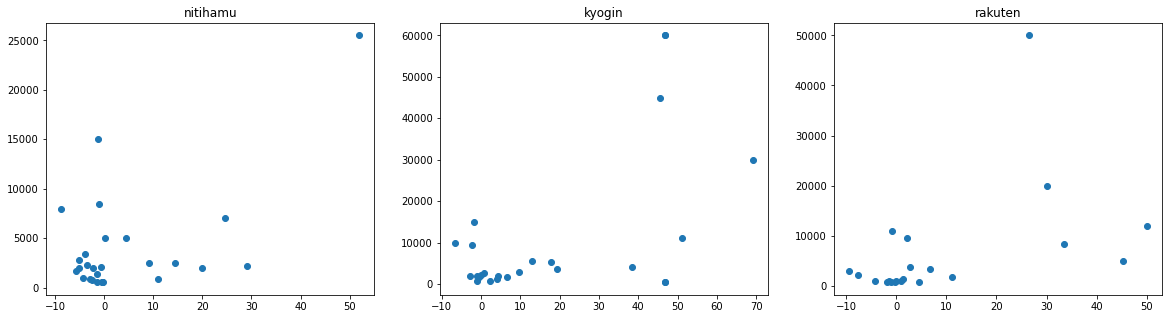

In [216]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(a["wraa"],a["年棒_y"])
plt.title("nitihamu")

plt.subplot(132)
plt.scatter(b["wraa"],b["年棒_y"])
plt.title("kyogin")

plt.subplot(133)
plt.scatter(c["wraa"],c["年棒_y"])
plt.title("rakuten")

日本ハムはwraaが低い選手が多い。一方で一人飛び抜けてwraaが高い選手がいる
巨人は日ハムよりwraaが高い選手が多い
楽天はwraaが低いが年棒が高い選手がいる

Text(0.5, 1.0, 'hannsinn')

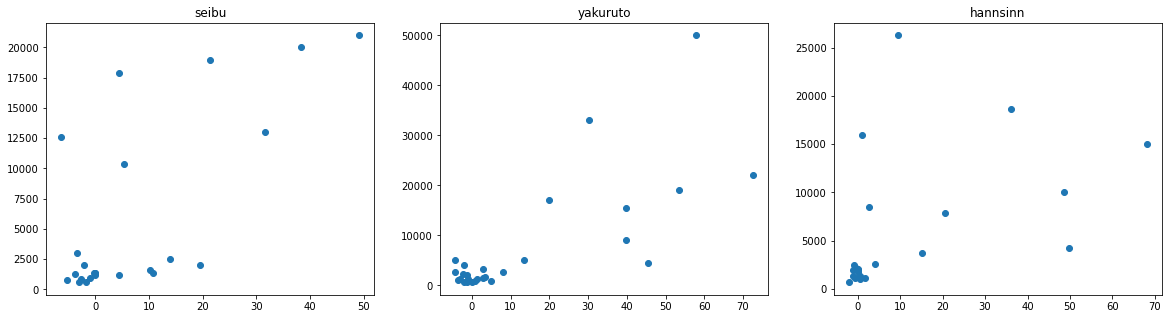

In [217]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(d["wraa"],d["年棒_y"])
plt.title("seibu")

plt.subplot(132)
plt.scatter(e["wraa"],e["年棒_y"])
plt.title("yakuruto")

plt.subplot(133)
plt.scatter(f["wraa"],f["年棒_y"])
plt.title("hannsinn")

ヤクルトと阪神は比較的高いwraaとなっている
西武は他と比較して低い年棒となっている

Text(0.5, 1.0, 'orikkusu')

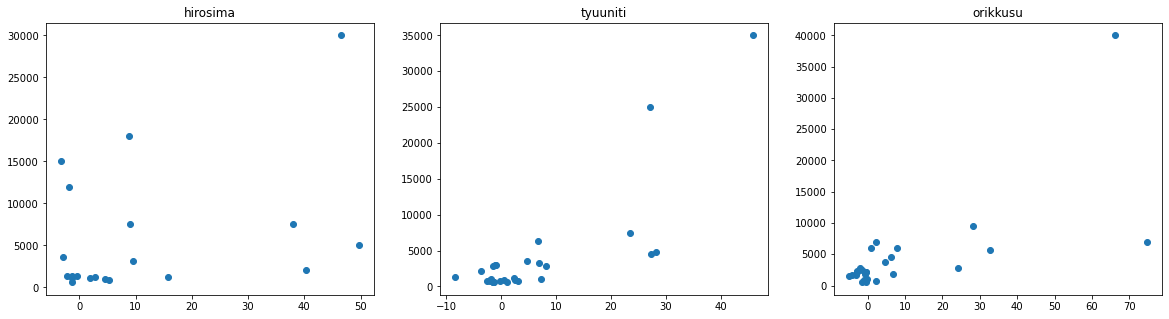

In [218]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(g["wraa"],g["年棒_y"])
plt.title("hirosima")

plt.subplot(132)
plt.scatter(h["wraa"],h["年棒_y"])
plt.title("tyuuniti")

plt.subplot(133)
plt.scatter(i["wraa"],i["年棒_y"])
plt.title("orikkusu")

中日は比較的低いwraaの選手が多く、高くても50にいかない
広島は支払っている年棒が比較的少ない
オリックスは一部の高いwraaの選手に高額の年棒を支払っている

Text(0.5, 1.0, 'DeNA')

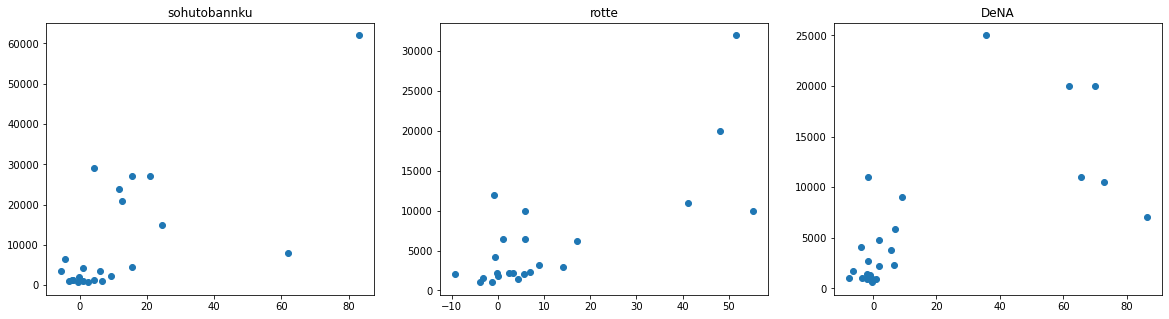

In [219]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(j["wraa"],j["年棒_y"])
plt.title("sohutobannku")

plt.subplot(132)
plt.scatter(k["wraa"],k["年棒_y"])
plt.title("rotte")

plt.subplot(133)
plt.scatter(l["wraa"],l["年棒_y"])
plt.title("DeNA")

ソフトバンクはwraa20周辺の選手に対して他の球団よりも高額な年棒を支払っている

今回はwraaの中央値を適正な年棒として推論をする
最大値105,最小値-15

In [220]:
#欠損値を0に変更
df["wraa"].fillna(df["wraa"].mean(),inplace = True)
df["woba"].fillna(df["woba"].mean(),inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [224]:
#欠損が消えているか確認
df[["woba","wraa"]].isnull().sum()

woba    0
wraa    0
dtype: int64

In [225]:
#クラスタリング
columns =['打率', '試合', '打席数', '打数', '得点', '安打', '二塁打', '三塁打',
       '本塁打', '塁打', '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '敬遠', '死球', '三振',
       '併殺打', '出塁率', '長打率', 'ops', 'woba', 'wraa', '年齢','年数',
       '年棒']
df3 = df[columns]

In [226]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3_sc = sc.fit_transform(df3)
df3_sc = pd.DataFrame(df3_sc,columns=df3.columns)

In [227]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=1)
model.fit(df3_sc)

KMeans(n_clusters=4, random_state=1)

In [228]:
cluster = model.labels_
cluster

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [229]:
df3['cluster'] = cluster

<ipython-input-229-c7e10bb58733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = cluster


In [230]:
df3.groupby('cluster').mean().style.bar(axis=0)

,打率,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,敬遠,死球,三振,併殺打,出塁率,長打率,ops,woba,wraa,年齢,年数,年棒
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.277966,118.974576,486.203390,425.677966,57.932203,118.618644,22.855932,1.593220,17.932203,198.457627,63.966102,5.203390,2.457627,1.516949,3.237288,50.864407,3.262712,4.898305,85.872881,9.796610,0.358746,0.467847,0.826593,0.361215,45.744097,29.762712,7.762712,18625.338983
1,0.220123,38.844930,75.924453,67.693837,7.240557,14.737575,2.439364,0.314115,1.151093,21.258449,6.083499,1.286282,0.634195,1.707753,0.411531,5.335984,0.165010,0.769384,17.224652,1.244533,0.284012,0.315911,0.599922,0.261921,0.812662,27.636183,6.946322,3452.037773
2,0.068932,15.010417,17.453125,15.890625,1.546875,1.604167,0.234375,0.026042,0.062500,2.078125,0.604167,0.401042,0.161458,0.619792,0.098958,0.755208,0.015625,0.088542,5.109375,0.260417,0.109760,0.086557,0.196318,0.082979,-1.624458,25.781250,5.843750,1587.520833
3,0.251991,90.567442,315.883721,280.948837,30.665116,71.200000,11.902326,1.516279,5.455814,102.502326,27.688372,5.348837,2.427907,5.758140,1.786047,24.479070,0.906977,2.902326,57.618605,5.706977,0.317047,0.368051,0.685098,0.301088,13.810481,29.209302,7.786047,9331.744186


クラスター1は打席成績、年齢・年数ともに最高級であり年棒も非常に高いTOPベテランタイプ
クラスター2は年齢・年数が結構入っているが打席数、打席成績が悪い控えベテランタイプ
クラスター3は打席成績が悪く、年齢・年数も若いプロ成り立て新人タイプ
クラスター4は打席成績はまずまずだが盗塁、犠牲フライが多く、年齢が高い３枚目ベテランタイプ

In [244]:
#wraaが40以下で年棒が40000万円を超えている選手は外れ値として除外
print(df.shape)
target = df.index[(df["wraa"] < 40) & (df["年棒"] >= 40000)]
df2 = df.drop(target)
print(df2.shape)

(1028, 33)
(989, 33)


In [245]:
#2021年のwraaと2022年の年棒で確認
tmp1 = df2[df2["year"]==2021] 
tmp1 = pd.merge(tmp1,df2[df2["year"]==2022][["選手名","年棒"]],on="選手名",how="inner")

In [279]:
#2020年のwraaと2021年の年棒で確認
x = df2[df2["year"]==2020].drop(["順位","選手名","チーム","year","守備","年棒"],axis=1) 
y = df2[df2["year"]==2020]["年棒"]
x_test = tmp1.drop(["順位","選手名","チーム","year","守備","年棒_x","年棒_y"],axis=1)
y_test = tmp1["年棒_y"]

In [280]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=0)

In [281]:
#リッジ回帰
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge().fit(x_train, y_train)

In [282]:
print(f"training dataに対しての精度: {ridge.score(x_train, y_train):.2}")
print(f"test set scoreに対しての精度: {ridge.score(x_test, y_test):.2f}")

training dataに対しての精度: 0.72
test set scoreに対しての精度: 0.40


In [268]:
pred_test = ridge.predict(x_test)

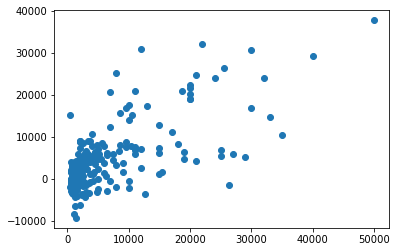

In [269]:
plt.scatter(y_test,pred_test)

予測値にマイナスが出てしまう。
正規分布の幅分ずれることがあるためマイナスとして出てくることがある。

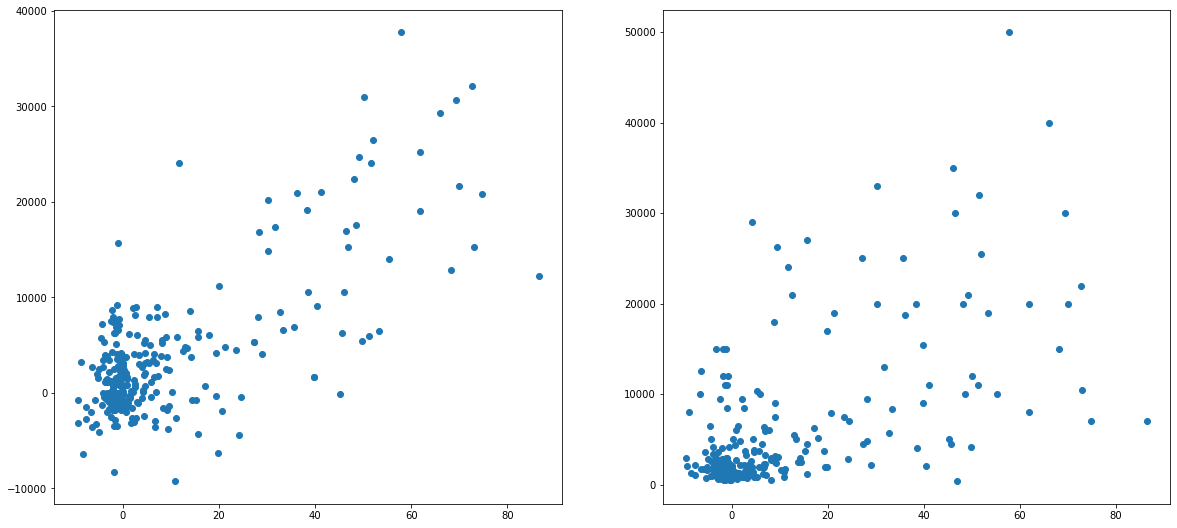

In [277]:
x_test["pred"] = pred_test
x_test["ans"] = y_test

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.scatter(x_test["wraa"],x_test["pred"])

plt.subplot(222)
plt.scatter(x_test["wraa"],x_test["ans"])

予測結果を見ると、wraaが低い選手でマイナス年棒が発生している。
しかし、wraaが低いが年棒が高いといった選手の年棒は少し低く出ている印象である。